# Recados

Machine Learning II 
- Início: 27/05 
- Fim: 21/06

https://github.com/renatapink/DS_turma815  
https://drive.google.com/drive/folders/1D1Zs2qH0YQSqXB9WRAeM8n_TUYOmI3gq

http://dontpad.com/turma815

# Balanceamento de dados

In [18]:
# importando as bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

Entender o nosso problema e nossos dados


1 - age (numeric)

2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown", "secondary", "primary", "tertiary")

5 - default: has credit in default? (binary: "yes", "no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes", "no")

8 - loan: has personal loan? (binary: "yes", "no")

9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
# Carregar o dataset (depois de ter um conhecimento prévio dele)
df =  pd.read_csv('../datasets/bank-full.csv')

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# Análise exporatória de dados

# nulos (missing), dados duplicados, distribuição, (tratamento de dados), dados categóricos/numéricos


df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# Definir quem são as features e quem é o target

X = df.select_dtypes(include=np.number) #features
y = df['Target'] # target

In [12]:
df['Target'].value_counts(dropna=False)

no     39922
yes     5289
Name: Target, dtype: int64

In [13]:
df['Target'].value_counts(dropna=False, normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

Completamente desbalanceados

In [14]:
# particionar os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
print(y_train.value_counts(normalize=True))

no     0.883018
yes    0.116982
Name: Target, dtype: float64


In [52]:
print(y_test.value_counts(normalize=True))

no     0.883003
yes    0.116997
Name: Target, dtype: float64


In [16]:
# Escolher um modelo. Modelo supervisionado - classificação

model = DecisionTreeClassifier() # Intânciando o modelo de classificação

# Treina o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Avalia o modelo - vale a pena predizer os dados de treino para ver comportamento (overfitting).....

y_pred = model.predict(X_test) # predição dos dados

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.91      0.91      7985
         yes       0.36      0.40      0.38      1058

    accuracy                           0.85      9043
   macro avg       0.64      0.65      0.65      9043
weighted avg       0.85      0.85      0.85      9043



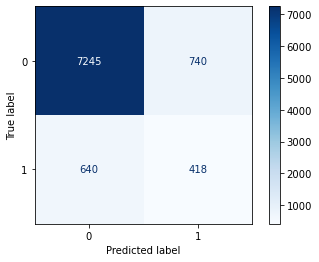

In [21]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')

# Balanceamento dos dados

1. Undersampling: diminuir a quantidade de amostras da classe majoritária para igualar a minoritária
2. Upsampling: aumentar a quantidade de amostras da classe minoritãria para igualar com a majoritária

<img src="images/resampling.png"  style="width:800px" />


*OBSERVAÇÃO*: fazer balanceamento apenas entre as amostras de treinamento!!!

In [23]:
y_train.value_counts()

no     31937
yes     4231
Name: Target, dtype: int64

Biblioteca: https://imbalanced-learn.org/

### Oversampling
[imblearn.over_sampling.SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape oversampling', Counter(y_res))


Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape oversampling Counter({'no': 31937, 'yes': 31937})


[imblearn.over_sampling.RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [30]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm1 = RandomOverSampler(random_state=42)
X_res, y_res = sm1.fit_resample(X_train, y_train)

print('Dataset shape oversampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape oversampling Counter({'no': 31937, 'yes': 31937})


[imblearn.over_sampling.ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

In [31]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape oversampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Original dataset shape Counter({'yes': 32921, 'no': 31937})


### Undersampling

[imblearn.under_sampling.RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = RandomUnderSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape undersampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape undersampling Counter({'no': 4231, 'yes': 4231})


[imblearn.under_sampling.TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

In [34]:
# **********************************************
from imblearn.under_sampling import TomekLinks 
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = TomekLinks()
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape undersampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape undersampling Counter({'no': 30445, 'yes': 4231})


### Up + Downsampling

[imblearn.combine.SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

In [37]:
from imblearn.combine import SMOTEENN 
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape undersampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape undersampling Counter({'yes': 27195, 'no': 22414})


In [36]:
# **********************************************
from imblearn.combine import SMOTETomek 
from collections import Counter

print('Original dataset shape', Counter(y_train))

sm = SMOTETomek(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Dataset shape undersampling', Counter(y_res))

Original dataset shape Counter({'no': 31937, 'yes': 4231})
Dataset shape undersampling Counter({'no': 31035, 'yes': 31035})


Voltar ao nosso modelo

In [40]:
# Escolher um modelo. Modelo supervisionado - classificação

model1 = DecisionTreeClassifier() # Intânciando o modelo de classificação

# Treina o modelo
model1.fit(X_res, y_res)

DecisionTreeClassifier()

In [41]:
# Avalia o modelo - vale a pena predizer os dados de treino para ver comportamento (overfitting).....

y_pred1 = model1.predict(X_res) # predição dos dados

In [42]:
print(classification_report(y_res, y_pred1))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     22414
         yes       1.00      1.00      1.00     27195

    accuracy                           1.00     49609
   macro avg       1.00      1.00      1.00     49609
weighted avg       1.00      1.00      1.00     49609



Usando outro algoritmo

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # cria o objeto
logreg.fit(X_train,y_train) # da um fit (treinar o modelo)
y_pred = logreg.predict(X_test) # da um predict (fazer as predições)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7985
         yes       0.54      0.14      0.22      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.56      0.58      9043
weighted avg       0.85      0.89      0.85      9043



In [49]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression() # cria o objeto
logreg1.fit(X_res,y_res) # da um fit (treinar o modelo)
y_pred1 = logreg1.predict(X_test) # da um predict (fazer as predições)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.96      0.71      0.81      7985
         yes       0.26      0.78      0.39      1058

    accuracy                           0.71      9043
   macro avg       0.61      0.74      0.60      9043
weighted avg       0.88      0.71      0.76      9043

